In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [205]:
path_1 = r'D:\Equipo dinamita\Personal_Proyects\Pruebas y desafios\archive\CarPrice_Assignment.csv'
path_2 = r'D:\Equipo dinamita\Personal_Proyects\Pruebas y desafios\archive\Data Dictionary - carprices.xlsx'

data_1 = pd.read_csv(path_1)
data_2 = pd.read_excel(path_2)

In [206]:
data_1.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [207]:
data_1.columns # solo que significa cada columna de data_1

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [208]:
data_1.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [209]:
data_1.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [210]:
data_numeric = data_1.select_dtypes(include=['int', 'float64'])


data_numeric = data_numeric.drop(columns = ['car_ID','symboling'])

data_numeric.head()


,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [211]:
data_evaluate = data_numeric.drop(columns = 'price')
data_price = data_numeric['price']

<AxesSubplot: >

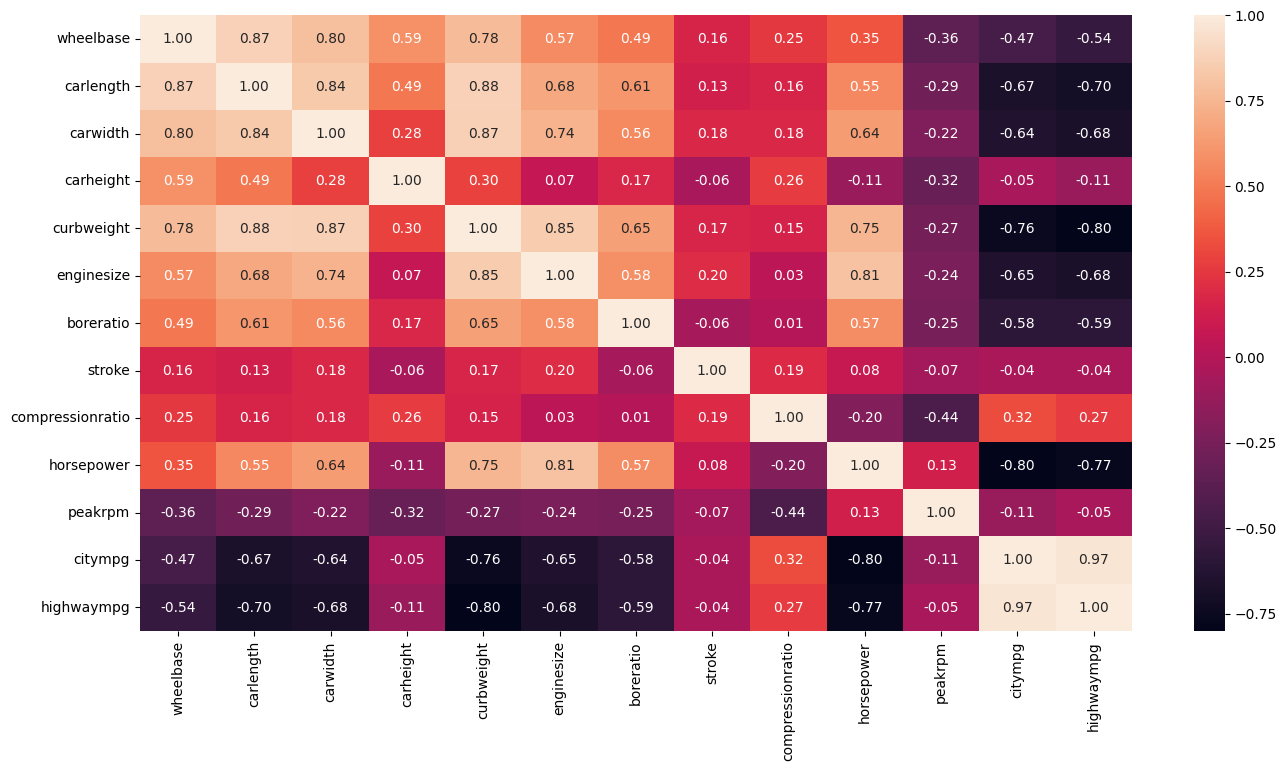

In [212]:
corr = data_evaluate.corr()

fig, ax = plt.subplots(figsize=(16,8))
sns.heatmap(corr,annot=True, fmt = '.2f', ax = ax)

In [213]:
X_train,X_test,Y_train,Y_test = train_test_split(data_evaluate,data_price, test_size = 0.2, random_state = 20)

In [214]:
model = LinearRegression()

In [215]:
model.fit(X_train,Y_train)

LinearRegression()

In [216]:
model.coef_

array([ 1.43760270e+02, -1.35224127e+02,  6.62773144e+02,  2.31181055e+02,
        2.15323266e+00,  1.17118598e+02, -4.61752870e+02, -3.03554634e+03,
        2.95939601e+02,  3.88394144e+01,  2.79732561e+00, -4.27053402e+02,
        3.47528049e+02])

In [217]:
Y_pred = model.predict(X_test)

In [218]:
r2_score_mean = mean_squared_error(Y_test, Y_pred)

In [219]:
def r2(real,pred):
    return np.sum((pred-pred.mean())**2)/np.sum((real-real.mean())**2)

In [220]:
r2_score_new = r2(Y_test, Y_pred)

In [221]:
r2_score_sklearn = model.score(X_test, Y_test)

In [222]:
print(r2_score_new)

1.45418554065826


In [223]:
print(r2_score_sklearn)

0.7230345089841739


In [224]:
# borrando datos no correlacionados
corr_partial = data_numeric.corr()['price'].abs()

In [225]:
corr_partial = corr_partial.sort_values(ascending=False)

corr_partial

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
highwaympg          0.697599
citympg             0.685751
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
peakrpm             0.085267
stroke              0.079443
compressionratio    0.067984
Name: price, dtype: float64

In [226]:
data_numeric.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [227]:
data_numeric_new = data_numeric.drop(columns = ['compressionratio', 'stroke', 'peakrpm', 'carheight'])

columns = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'citympg', 'highwaympg', 'price']
print(columns)

['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg', 'price']


In [228]:
data_evaluate = data_numeric_new.drop(columns = 'price')
data_price = data_numeric_new['price']

In [229]:
X_train,X_test,Y_train,Y_test = train_test_split(data_evaluate,data_price, test_size = 0.2, random_state = 26)

model2 = LinearRegression()

In [230]:
model2.fit(X_train,Y_train)

LinearRegression()

In [231]:
Y_pred = model2.predict(X_test)

r2_score_mean = mean_squared_error(Y_test, Y_pred)
r2_score_sklearn = model2.score(X_test, Y_test)
r2_score_sklearn_real = model2.score(X_train, Y_train)

print(r2_score_mean)
print(r2_score_sklearn)
print(r2_score_sklearn_real)

7884889.994468048
0.8257788969075408
0.8170848671477329


In [232]:

scaler = StandardScaler()
data_scaler = scaler.fit_transform(data_1[columns])

data_scaler

array([[-1.6907718 , -0.42652147, -0.84478235, ..., -0.64655303,
        -0.54605874,  0.02739114],
       [-1.6907718 , -0.42652147, -0.84478235, ..., -0.64655303,
        -0.54605874,  0.4044611 ],
       [-0.70859588, -0.23151305, -0.19056612, ..., -0.95301169,
        -0.69162706,  0.4044611 ],
       ...,
       [ 1.72187336,  1.19854871,  1.39824472, ..., -1.10624102,
        -1.12833203,  1.02998314],
       [ 1.72187336,  1.19854871,  1.39824472, ...,  0.11959362,
        -0.54605874,  1.15358178],
       [ 1.72187336,  1.19854871,  1.39824472, ..., -0.95301169,
        -0.83719538,  1.17303131]])

In [233]:
data_scaler2 = pd.DataFrame(data_scaler, columns=columns)

In [234]:
data_evaluate = data_scaler2.drop(columns = 'price')
data_price = data_scaler2['price']

In [235]:
X_train,X_test,Y_train,Y_test = train_test_split(data_evaluate,data_price, test_size = 0.2, random_state = 26)

model3 = LinearRegression()

In [236]:
model3.fit(X_train,Y_train)

LinearRegression()

In [237]:
Y_pred = model3.predict(X_test)

r2_score_mean = mean_squared_error(Y_test, Y_pred)
r2_score_sklearn = model3.score(X_test, Y_test)
r2_score_sklearn_real = model3.score(X_train, Y_train)

print(r2_score_mean)
print(r2_score_sklearn)
print(r2_score_sklearn_real)

0.12415109235548365
0.8257788969075455
0.8170848671477329


In [238]:
from sklearn.preprocessing import LabelEncoder

In [239]:
label_encoder = LabelEncoder()
# data_enconder_drivewheel = data_1['drivewheel']

data_enconder_drivewheel = label_encoder.fit_transform(data_1['drivewheel'])

data_enconder_drivewheel = pd.DataFrame(data_enconder_drivewheel, columns = ['drivewheel'])



In [240]:
data_enconder_drivewheel.head()

,drivewheel
0,2
1,2
2,2
3,1
4,0


In [241]:
data_1['drivewheel'].head()

0    rwd
1    rwd
2    rwd
3    fwd
4    4wd
Name: drivewheel, dtype: object

In [242]:
variables_categoricas = data_1.select_dtypes(include=['object'])

In [243]:
print(variables_categoricas.columns)

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')


In [244]:
var_cate = ['fueltype',  'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem']

In [245]:
encoder_total = LabelEncoder()

In [246]:
# data_encoder = encoder_total.fit_transform(data_1[var_cate])

data_encoder = data_1[var_cate].apply(lambda col: label_encoder.fit_transform(col))

data_encoder = pd.DataFrame(data_encoder, columns = var_cate)

data_encoder

,fueltype,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,1,1,0,2,0,0,2,5
1,1,1,0,2,0,0,2,5
2,1,1,2,2,0,5,3,5
3,1,0,3,1,0,3,2,5
4,1,0,3,0,0,3,1,5
...,...,...,...,...,...,...,...,...
200,1,0,3,2,0,3,2,5
201,1,0,3,2,0,3,2,5
202,1,0,3,2,0,5,3,5
203,0,0,3,2,0,3,3,3


In [247]:
data_encoder['fueltype_invert'] = data_encoder['fueltype'].replace({1: 0, 0: 1})

In [248]:
data_encoder = data_encoder.drop(columns = ['fueltype'])

In [249]:
data_encoder['drivewheel'].values

array([2, 2, 2, 1, 0, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2])

In [250]:
data_encoder['drivewheel'] = data_encoder['drivewheel'].replace({2: 1, 0: 2, 1: 0 })

data_encoder = data_encoder['drivewheel']

In [251]:
data_total = pd.concat([data_evaluate,data_encoder], axis=1)
data_total.shape

(205, 10)

In [252]:
X_train,X_test,Y_train,Y_test = train_test_split(data_total, data_price, test_size = 0.2, random_state = 26)

model4 = LinearRegression()

In [253]:
model4.fit(X_train,Y_train)

LinearRegression()

In [254]:
Y_pred = model4.predict(X_test)

r2_score_mean = mean_squared_error(Y_test, Y_pred)
r2_score_sklearn = model4.score(X_test, Y_test)
r2_score_sklearn_real = model4.score(X_train, Y_train)

print(r2_score_mean)
print(r2_score_sklearn)
print(r2_score_sklearn_real)

0.1278310064991513
0.8206148770891811
0.82807439646415


In [255]:
import statsmodels.api as sm

X2 = sm.add_constant(data_total)
est = sm.OLS(data_price, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     95.47
Date:                Fri, 28 Jul 2023   Prob (F-statistic):           2.34e-69
Time:                        20:30:20   Log-Likelihood:                -108.58
No. Observations:                 205   AIC:                             239.2
Df Residuals:                     194   BIC:                             275.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1057      0.044     -2.378      0.0

In [ ]:
##########################################################

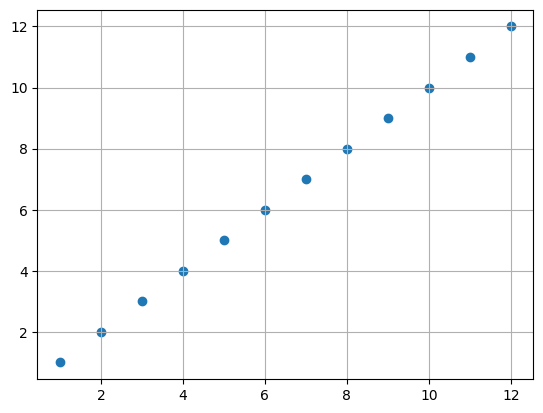

In [28]:
x = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
y = np.array([1,2,3,4,5,6,7,8,9,10,11,12])

plt.scatter(x,y)
plt.grid()

In [29]:
cate = np.array([0,0,0,0,0,0,0,0,0,0,0,0])

model = LinearRegression()

X = np.column_stack((x, cate))

In [30]:
model.fit(X, y)

LinearRegression()

In [31]:
model.coef_ # y = m1x1 + m2(x2)

array([1., 0.])

In [32]:
model.intercept_

2.6645352591003757e-15

In [60]:
cate2 = np.array([1,1,1,0,1,0,0,0,0,0,0,0]) # encedido 1 apagado 0

In [61]:
model2 = LinearRegression()

X2 = np.column_stack((x, cate2))

In [62]:
model2.fit(X2, y)

LinearRegression()

In [63]:
model2.coef_

array([1.00000000e+00, 4.34409403e-17])

In [64]:
model2.intercept_

1.7763568394002505e-15

In [65]:
import scipy.stats as stats
corr, pval=stats.pearsonr(cate2,x)

In [66]:
print(corr)

0.7681373347487839
